<a href="https://colab.research.google.com/github/felipe24I/Entregas/blob/main/Detector_Musica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descargar mp3 videos youtube

In [1]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 7.6 MB/s eta 0:00:00
  Created wh

In [8]:
import os
import yt_dlp as youtube_dl
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

## Lista links videos y nombres salida mp3

In [12]:
link_= ["https://www.youtube.com/watch?v=7R85In_V8iE",
        'https://www.youtube.com/watch?v=3yCbgVnqiRw',
        'https://www.youtube.com/watch?v=BgfcToAjfdc'
       ]
name_ = ['blessd',
         'esteban_rojas',
         'kygo'
        ]

# Leer wav en numpy

In [13]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('Pruebas')
except:
  print("Carpeta Pruebas ya existe")

#recorrer excel con videos
N = len(link_)
Ns = N * 5 #cantidad de segmentos por cancion
for n in range(N):
    name_rout = 'Pruebas/'+name_[n]
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(link_[n],name_rout)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_rout+'.mp3',
                   name_rout+'.wav'])

Carpeta Pruebas ya existe
[youtube] Extracting URL: https://www.youtube.com/watch?v=7R85In_V8iE
[youtube] 7R85In_V8iE: Downloading webpage
[youtube] 7R85In_V8iE: Downloading ios player API JSON
[youtube] 7R85In_V8iE: Downloading android player API JSON
[youtube] 7R85In_V8iE: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=7R85In_V8iE
[youtube] 7R85In_V8iE: Downloading webpage
[youtube] 7R85In_V8iE: Downloading ios player API JSON
[youtube] 7R85In_V8iE: Downloading android player API JSON
[youtube] 7R85In_V8iE: Downloading m3u8 information
[info] 7R85In_V8iE: Downloading 1 format(s): 251
[download] Pruebas/blessd.mp3 has already been downloaded
[download] 100% of    3.19MiB
Download complete... Pruebas/blessd.mp3
[youtube] Extracting URL: https://www.youtube.com/watch?v=3yCbgVnqiRw
[youtube] 3yCbgVnqiRw: Downloading webpage
[youtube] 3yCbgVnqiRw: Downloading ios player API JSON
[youtube] 3yCbgVnqiRw: Downloading android player API JSON
[youtube] 3y

In [14]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'Pruebas/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['kygo.wav', 'esteban_rojas.wav', 'blessd.wav']

In [15]:
!pip install soundfile #instalar sondfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile
#leer archivos y crear np.array audios
fs = 48000
tl = np.array([40,50,60,70,80,90,100]) #puntos lectura
ts = 5 #t segmento
Ns = len(wav_files)*len(tl) #cantidad segmentos
x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs = sf.read(path+name)
    for ti in tl: #segmentos de tiempo
        x_t[i] = x[int(fs*ti):int(fs*(ti+ts)),:]
        name_c += [name[:-6]]
        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música {label[i]}")
        i+=1
x_t.shape

0 lectura: blessd.wav; segundo 40:45; tipo música [0.]
1 lectura: blessd.wav; segundo 50:55; tipo música [0.]
2 lectura: blessd.wav; segundo 60:65; tipo música [0.]
3 lectura: blessd.wav; segundo 70:75; tipo música [0.]
4 lectura: blessd.wav; segundo 80:85; tipo música [0.]
5 lectura: blessd.wav; segundo 90:95; tipo música [0.]
6 lectura: blessd.wav; segundo 100:105; tipo música [0.]
7 lectura: feid.wav; segundo 40:45; tipo música [0.]
8 lectura: feid.wav; segundo 50:55; tipo música [0.]
9 lectura: feid.wav; segundo 60:65; tipo música [0.]
10 lectura: feid.wav; segundo 70:75; tipo música [0.]
11 lectura: feid.wav; segundo 80:85; tipo música [0.]
12 lectura: feid.wav; segundo 90:95; tipo música [0.]
13 lectura: feid.wav; segundo 100:105; tipo música [0.]
14 lectura: adolescents.wav; segundo 40:45; tipo música [0.]
15 lectura: adolescents.wav; segundo 50:55; tipo música [0.]
16 lectura: adolescents.wav; segundo 60:65; tipo música [0.]
17 lectura: adolescents.wav; segundo 70:75; tipo músi

(21, 240000, 2)

In [ ]:
from IPython.display import Audio #reproducir segmento
i = 16
Audio(x_t[i].T,rate=fs)

In [ ]:
#IMPORTANDO LIBRERÍAS
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(21, 120001)

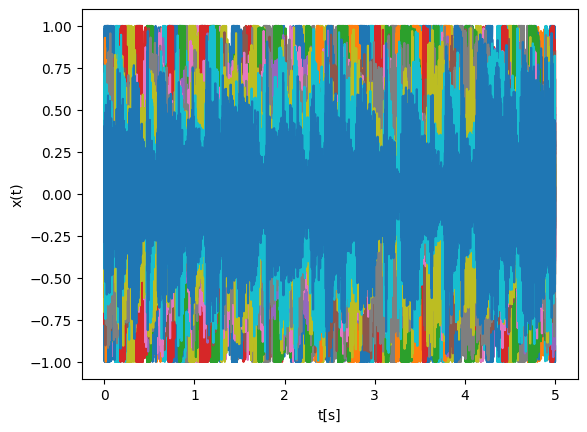

In [ ]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

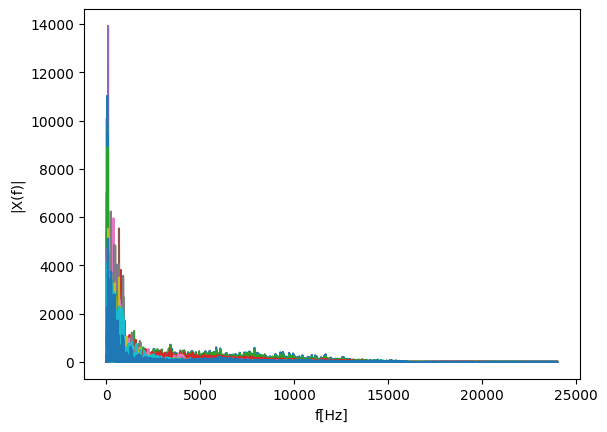

In [ ]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

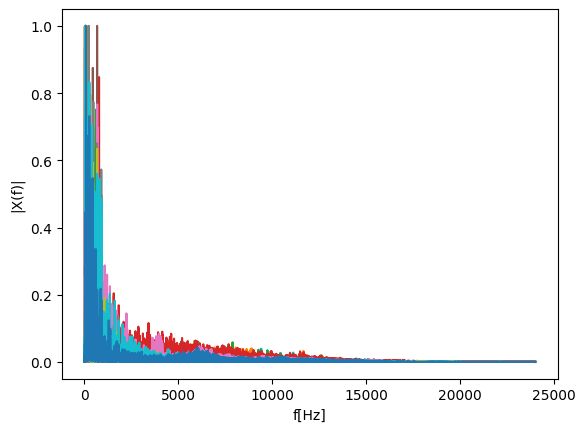

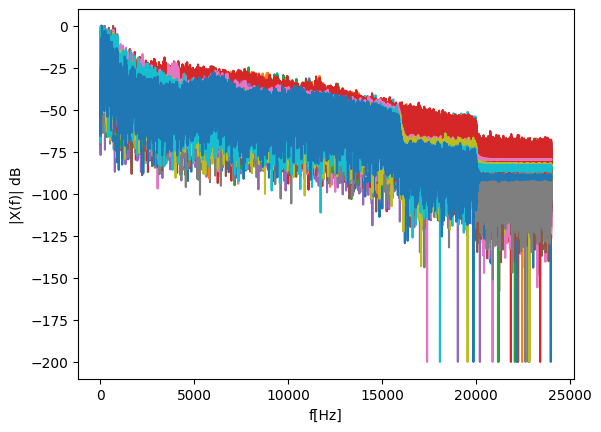

In [ ]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib

# Ruta al archivo del modelo en Google Colab
ruta_al_modelo = '/content/drive/My Drive/Modelo/reggaeton_vs_salsa.pkl'  # Ajusta la ruta y el nombre del archivo según tu ubicación

# Carga el modelo desde el archivo .pkl
modelo_cargado = joblib.load(ruta_al_modelo)
modelo_cargado.keys()


dict_keys(['Xw_', 'fmax', 'label', 'name_c', 'vf', 'fs'])